In [96]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [97]:
df = pd.read_csv('train.csv')

In [98]:
df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

In [100]:
df.drop('id', axis=1, inplace=True)

In [101]:
df.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [102]:
def loss_rate(x):  # x is DataFrmae type
    table = ((x.isnull().sum())/x.shape[0]).sort_values(ascending=False).map(lambda i:"{:.2%}".format(i))
    return table

In [103]:
loss_rate(df)

store_sales(in millions)      0.00%
unit_sales(in millions)       0.00%
total_children                0.00%
num_children_at_home          0.00%
avg_cars_at home(approx).1    0.00%
gross_weight                  0.00%
recyclable_package            0.00%
low_fat                       0.00%
units_per_case                0.00%
store_sqft                    0.00%
coffee_bar                    0.00%
video_store                   0.00%
salad_bar                     0.00%
prepared_food                 0.00%
florist                       0.00%
cost                          0.00%
dtype: object

<Axes: >

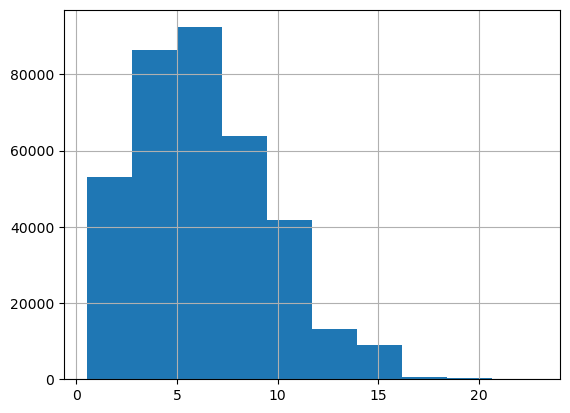

In [104]:
df['store_sales(in millions)'].hist()

In [105]:
y = df['cost']
df.drop('cost', axis=1, inplace=True)

In [106]:
print(y)
df.head()

0          62.09
1         121.80
2          83.51
3          66.78
4         111.51
           ...  
360331    133.42
360332     81.85
360333     87.07
360334    146.72
360335    122.47
Name: cost, Length: 360336, dtype: float64


,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0


# 准备数据 prepare data

## 分割数据 split data

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y)

In [108]:
x_train.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
151987,3.10,2.0,2.0,0.0,3.0,18.00,0.0,0.0,15.0,23598.0,1.0,0.0,0.0,0.0,1.0
115705,6.92,4.0,4.0,0.0,1.0,12.80,0.0,1.0,23.0,30584.0,1.0,1.0,1.0,1.0,1.0
110130,5.18,2.0,2.0,0.0,3.0,11.30,0.0,1.0,2.0,23598.0,0.0,0.0,0.0,0.0,1.0
27660,1.06,2.0,0.0,0.0,4.0,6.18,1.0,0.0,24.0,30584.0,1.0,1.0,1.0,1.0,1.0
63344,10.28,4.0,3.0,0.0,3.0,15.20,1.0,0.0,6.0,34791.0,0.0,0.0,1.0,1.0,0.0


In [109]:
y_train.head()

151987    101.84
115705    141.38
110130     83.26
27660      87.07
63344      69.54
Name: cost, dtype: float64

## 标准化 standardize

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 构建神经网络  build DNN

In [138]:
 # type: ignore
model = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1)
])

In [139]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                800       
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 dense_23 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,951
Trainable params: 5,951
Non-trainable params: 0
_________________________________________________________________


In [158]:
model.compile(loss='mae', optimizer="adam")
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
6757/6757 [==============================] - 6s 878us/step - loss: 23.8810 - val_loss: 23.9476
Epoch 2/50
6757/6757 [==============================] - 10s 1ms/step - loss: 23.8521 - val_loss: 23.9338
Epoch 3/50
6757/6757 [==============================] - 12s 2ms/step - loss: 23.8272 - val_loss: 23.9822
Epoch 4/50
6757/6757 [==============================] - 11s 2ms/step - loss: 23.7943 - val_loss: 23.9413
Epoch 5/50
6757/6757 [==============================] - 9s 1ms/step - loss: 23.7682 - val_loss: 23.8910
Epoch 6/50
6757/6757 [==============================] - 8s 1ms/step - loss: 23.7403 - val_loss: 23.9155
Epoch 7/50
6757/6757 [==============================] - 11s 2ms/step - loss: 23.7156 - val_loss: 24.0313
Epoch 8/50
6757/6757 [==============================] - 8s 1ms/step - loss: 23.6928 - val_loss: 23.8200
Epoch 9/50
6757/6757 [==============================] - 9s 1ms/step - loss: 23.6799 - val_loss: 23.7512
Epoch 10/50
6757/6757 [==============================] - 1

In [159]:
mse_test = model.evaluate(x_test, y_test)

2816/2816 [==============================] - 2s 608us/step - loss: 23.2606


In [160]:
pd.DataFrame(history.history).head()

,loss,val_loss
0,23.880980,23.947556
1,23.852079,23.933792
2,23.827177,23.982155
3,23.794312,23.941334
4,23.768171,23.891027


<Axes: >

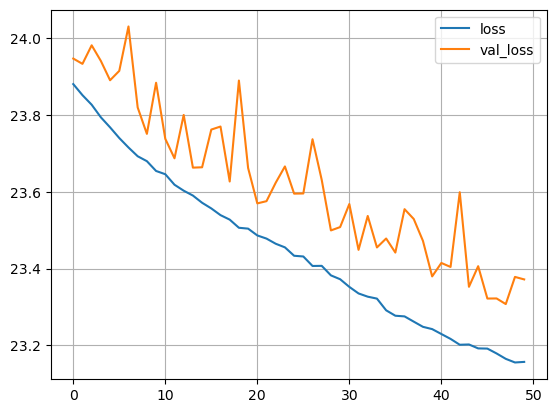

In [161]:
pd.DataFrame(history.history).plot(grid=True)

In [162]:
x_new = x_test[:8]

In [163]:
y_pred = model.predict(x_new)

1/1 [==============================] - 0s 42ms/step


In [164]:
y_test[:8]

265946     66.37
222203     77.24
237413     58.16
336298     55.96
104945    109.14
237363     59.86
190946    146.72
28338     101.96
Name: cost, dtype: float64

In [165]:
y_pred[:8]

array([[100.79321 ],
       [ 95.104034],
       [ 85.32041 ],
       [ 98.06683 ],
       [ 89.958954],
       [ 66.41212 ],
       [ 87.67026 ],
       [ 89.57003 ]], dtype=float32)

# 预测 predict

In [166]:
target = pd.read_csv('test.csv')

In [167]:
x_target = scaler.fit_transform(target.drop('id', axis=1))

In [168]:
x_target

array([[ 0.26794107,  1.22106489, -0.97756259, ..., -1.00883078,
        -1.00889798, -1.00363656],
       [ 0.16514114, -1.33327669, -0.3052541 , ...,  0.99124652,
         0.99118049,  0.99637662],
       [ 0.6005291 , -0.0561059 , -1.64987108, ...,  0.99124652,
         0.99118049, -1.00363656],
       ...,
       [-0.01627052, -0.0561059 , -1.64987108, ...,  0.99124652,
         0.99118049, -1.00363656],
       [ 0.479588  , -1.33327669, -1.64987108, ...,  0.99124652,
         0.99118049,  0.99637662],
       [ 0.36469395, -0.0561059 , -0.97756259, ..., -1.00883078,
        -1.00889798, -1.00363656]])

In [169]:
y_target = model.predict(x_target)

7507/7507 [==============================] - 5s 602us/step


In [170]:
y_target

array([[114.70466 ],
       [ 95.77499 ],
       [ 86.742645],
       ...,
       [ 85.83837 ],
       [ 95.62051 ],
       [110.77112 ]], dtype=float32)

In [171]:
submission = pd.DataFrame()

In [172]:
submission['id'] = target['id']

In [173]:
submission['cost'] = y_target

In [174]:
submission.head()

,id,cost
0,360336,114.704659
1,360337,95.774986
2,360338,86.742645
3,360339,95.576340
4,360340,65.696167


In [175]:
submission.to_csv('sub.csv', index=False)